In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pickle

#set url
url = '/content/cancer_prediction_dataset.csv'

#create and display the dataframe
df = pd.read_csv(url)
df

,Gender,Age,Smoking,Fatigue,Allergy,Cancer
0,1,85,1,0,1,0
1,1,93,0,0,0,0
2,1,72,0,1,0,0
3,0,58,0,0,1,0
4,1,95,1,0,1,1
...,...,...,...,...,...,...
9995,1,89,1,0,1,0
9996,0,23,1,1,0,0
9997,1,99,0,0,1,0
9998,0,26,0,1,1,0


In [ ]:
#seperating the x and y, x values are features, y value are label/target
#in all supervise learning you must seperate x and y
x = df[['Gender', 'Age', 'Smoking', 'Fatigue', 'Allergy',]].values
y = df[['Cancer']].values

In [ ]:
#sklearn library that has many machine learning model
from sklearn.model_selection import train_test_split

#training set - algorithm will learn the relationship between x and y
#testing set - use to evaluate the model, see how well it has learn the relationship between x and y
#test_size - 30% of data reserved for testing, 70% of data reserved for training
#random state - 0 which means to run the same consistent code with same data
#x_train, y_train -> the algorithm will use these trained data and learn the relationship betwee x and y
#x_test, y_test -> x_test used to evaluate and predict, then it is compare with y_test (actual data points / real values/ true values)
#determine how many predictions were correct/not correct
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

#training the model - show it x and y and we ask it to learn the relationship between x and y
#creating model so that when given new set of x values it will be able to predict the y value

In [ ]:
#feature scaling - scaling the data of outliers so it doesnt skew out data/makes it more accurate
#scale the data with a average value of 0 and SD of 1
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
#importing libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm

#train the model by giving it x_train & y_train which are the x and y values
#knn model
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train.ravel())

#gnb model
gnb = GaussianNB()
gnb.fit(x_train, y_train.ravel())

#dt model
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

#rf model
rf = RandomForestClassifier()
rf.fit(x_train,y_train.ravel())

#lr model
lr = LogisticRegression()
lr.fit(x_train, y_train.ravel())

#svm model
svm = svm.SVC(kernel='rbf', probability = True)
svm.fit(x_train, y_train.ravel())

SVC(probability=True)

In [ ]:
#5-Fold Cross Validation for knn model
k = 5
kf = KFold(n_splits=k)
result = cross_val_score(knn, x_train, y_train.ravel(), cv = kf, scoring = 'accuracy')
print (f'Average accuracy: {result.mean()} ')

Average accuracy: 0.8995714285714286 


In [ ]:
#5-Fold Cross Validation for gnb Model
result = cross_val_score(gnb, x_train, y_train.ravel(), cv = kf, scoring='accuracy')
print(f' Average accuracy:{result.mean()}')

 Average accuracy:0.9038571428571428


In [ ]:
#5-Fold Cross Validation for dt Model
result = cross_val_score(dt, x_train, y_train.ravel(), cv = kf, scoring='accuracy')
print(f' Average accuracy:{result.mean()}')
print()
#Getting the parameters of the decision tree model
dt.get_params()

 Average accuracy:0.8952857142857142



{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
#5-Fold Cross Validation for rf Model
result = cross_val_score(rf, x_train, y_train.ravel(), cv = kf, scoring='accuracy')
print(f' Average accuracy:{result.mean()}')

 Average accuracy:0.8902857142857143


In [ ]:
#5-Fold Cross Validation for lr Model
result = cross_val_score(lr, x_train, y_train.ravel(), cv = kf, scoring='accuracy')
print(f' Average accuracy:{result.mean()}')

 Average accuracy:0.9038571428571428


In [ ]:
#5-Fold Cross Validation for svm Model
result = cross_val_score(svm, x_train, y_train.ravel(), cv = kf, scoring='accuracy')
print(f' Average accuracy:{result.mean()}')

 Average accuracy:0.9038571428571428


In [ ]:
#KNeighborsClassifier Predictions
y_predict_knn = knn.predict(x_test)
#Set of predicted probabilities
y_probability_knn = knn.predict_proba(x_test)

#GaussianNB Predictions
y_predict_gnb = gnb.predict(x_test)
#Set of predicted probabilities
y_probability_gnb = gnb.predict_proba(x_test)

#Decision Tree Predicitons
y_predict_dt = dt.predict(x_test)
#Set of predicted probabilities
y_probability_dt = dt.predict_proba(x_test)

#Random Forest Predictions
y_predict_rf = rf.predict(x_test)
#Set of predicted probabilities
y_probability_rf = rf.predict_proba(x_test)

#Logistic Regression Predictions
y_predict_lr = lr.predict(x_test)
#Set of predicted probabilities
y_probability_lr = lr.predict_proba(x_test)

#Support Vector Machine Predictions
y_predict_svm = svm.predict(x_test)
#Set of predicted probabilities
y_probability_svm = svm.predict_proba(x_test)

In [ ]:
#Creating probability dataframe for knn
probability_df = pd.DataFrame(y_probability_knn * 100, columns=['NoCancer%', 'Cancer%'])
y_predict_df = pd.DataFrame(y_predict_knn, columns = [['y_predict_knn']]) #predicted values
y_test_df = pd.DataFrame(y_test, columns = [['y_test']]) #actual values
comparison_df = pd.concat([y_test_df, y_predict_df, probability_df], axis = 1)
comparison_df

,"(y_test,)","(y_predict_knn,)",NoCancer%,Cancer%
0,0,0,80.0,20.0
1,0,0,100.0,0.0
2,1,0,60.0,40.0
3,0,0,100.0,0.0
4,0,0,80.0,20.0
...,...,...,...,...
2995,0,0,100.0,0.0
2996,0,0,100.0,0.0
2997,0,0,80.0,20.0
2998,0,0,100.0,0.0


In [ ]:
#Creating dataframe for gnb
probability_df = pd.DataFrame(y_probability_gnb * 100, columns=['NoCancer%', 'Cancer%'])
y_predict_df = pd.DataFrame(y_predict_gnb, columns = [['y_predict_gnb']]) #predicted values
y_test_df = pd.DataFrame(y_test, columns = [['y_test']]) #actual values
comparison_df = pd.concat([y_test_df, y_predict_df, probability_df], axis = 1)
comparison_df

,"(y_test,)","(y_predict_gnb,)",NoCancer%,Cancer%
0,0,0,90.400556,9.599444
1,0,0,90.874973,9.125027
2,1,0,89.538942,10.461058
3,0,0,90.527816,9.472184
4,0,0,91.378799,8.621201
...,...,...,...,...
2995,0,0,91.295465,8.704535
2996,0,0,90.235064,9.764936
2997,0,0,89.711576,10.288424
2998,0,0,90.632382,9.367618


In [ ]:
#Creating dataframe for dt
probability_df = pd.DataFrame(y_probability_dt * 100, columns=['NoCancer%', 'Cancer%'])
y_predict_df = pd.DataFrame(y_predict_dt, columns = [['y_predict_dt']]) #predicted values
y_test_df = pd.DataFrame(y_test, columns = [['y_test']]) #actual values
comparison_df = pd.concat([y_test_df, y_predict_df, probability_df], axis = 1)
comparison_df

,"(y_test,)","(y_predict_dt,)",NoCancer%,Cancer%
0,0,0,83.333333,16.666667
1,0,0,100.000000,0.000000
2,1,0,50.000000,50.000000
3,0,0,100.000000,0.000000
4,0,0,87.500000,12.500000
...,...,...,...,...
2995,0,0,100.000000,0.000000
2996,0,0,100.000000,0.000000
2997,0,0,100.000000,0.000000
2998,0,0,100.000000,0.000000


In [ ]:
#Creating dataframe for rf
probability_df = pd.DataFrame(y_probability_rf * 100, columns=['NoCancer%', 'Cancer%'])
y_predict_df = pd.DataFrame(y_predict_rf, columns = [['y_predict_rf']]) #predicted values
y_test_df = pd.DataFrame(y_test, columns = [['y_test']]) #actual values
comparison_df = pd.concat([y_test_df, y_predict_df, probability_df], axis = 1)
comparison_df

,"(y_test,)","(y_predict_rf,)",NoCancer%,Cancer%
0,0,0,79.198557,20.801443
1,0,0,100.000000,0.000000
2,1,0,52.072009,47.927991
3,0,0,100.000000,0.000000
4,0,0,85.149170,14.850830
...,...,...,...,...
2995,0,0,99.333333,0.666667
2996,0,0,99.875000,0.125000
2997,0,0,97.275000,2.725000
2998,0,0,100.000000,0.000000


In [ ]:
#Creating dataframe for lr
probability_df = pd.DataFrame(y_probability_lr * 100, columns=['NoCancer%', 'Cancer%'])
y_predict_df = pd.DataFrame(y_predict_lr, columns = [['y_predict_lr']]) #predicted values
y_test_df = pd.DataFrame(y_test, columns = [['y_test']]) #actual values
comparison_df = pd.concat([y_test_df, y_predict_df, probability_df], axis = 1)
comparison_df

,"(y_test,)","(y_predict_lr,)",NoCancer%,Cancer%
0,0,0,90.179316,9.820684
1,0,0,90.705169,9.294831
2,1,0,89.768218,10.231782
3,0,0,90.326513,9.673487
4,0,0,91.483103,8.516897
...,...,...,...,...
2995,0,0,91.610739,8.389261
2996,0,0,90.020420,9.979580
2997,0,0,89.541237,10.458763
2998,0,0,90.480807,9.519193


In [ ]:
#Creating probability dataframe for svm
probability_df = pd.DataFrame(y_probability_svm * 100, columns=['NoCancer%', 'Cancer%'])
y_predict_df = pd.DataFrame(y_predict_svm, columns = [['y_predict_svm']]) #predicted values
y_test_df = pd.DataFrame(y_test, columns = [['y_test']]) #actual values
comparison_df = pd.concat([y_test_df, y_predict_df, probability_df], axis = 1)
comparison_df

,"(y_test,)","(y_predict_svm,)",NoCancer%,Cancer%
0,0,0,88.892420,11.107580
1,0,0,91.054240,8.945760
2,1,0,88.748342,11.251658
3,0,0,88.612867,11.387133
4,0,0,88.076140,11.923860
...,...,...,...,...
2995,0,0,88.319195,11.680805
2996,0,0,90.307346,9.692654
2997,0,0,91.078878,8.921122
2998,0,0,88.994414,11.005586


In [ ]:
#Confusion matrix for knn
confusion_matrix(y_test, y_predict_knn)

array([[2677,   32],
       [ 284,    7]])

In [ ]:
#Confusion matrix for gnb
confusion_matrix(y_test, y_predict_gnb)

array([[2709,    0],
       [ 291,    0]])

In [ ]:
#Confusion matrix for dt
confusion_matrix(y_test, y_predict_dt)

array([[2689,   20],
       [ 291,    0]])

In [ ]:
#Confusion matrix for rf
confusion_matrix(y_test, y_predict_rf)

array([[2675,   34],
       [ 288,    3]])

In [ ]:
#Confusion matrix for lr
confusion_matrix(y_test, y_predict_lr)

array([[2709,    0],
       [ 291,    0]])

In [ ]:
#Confusion matrix for svm
confusion_matrix(y_test, y_predict_svm)

array([[2709,    0],
       [ 291,    0]])

In [ ]:
#Classification report knn
print(classification_report(y_test, y_predict_knn))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2709
           1       0.18      0.02      0.04       291

    accuracy                           0.89      3000
   macro avg       0.54      0.51      0.49      3000
weighted avg       0.83      0.89      0.86      3000



In [ ]:
#Classification report gnb
print(classification_report(y_test, y_predict_gnb))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2709
           1       0.00      0.00      0.00       291

    accuracy                           0.90      3000
   macro avg       0.45      0.50      0.47      3000
weighted avg       0.82      0.90      0.86      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Classification report dt
print(classification_report(y_test, y_predict_dt))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95      2709
           1       0.00      0.00      0.00       291

    accuracy                           0.90      3000
   macro avg       0.45      0.50      0.47      3000
weighted avg       0.81      0.90      0.85      3000



In [ ]:
#Classification report rf
print(classification_report(y_test, y_predict_rf))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2709
           1       0.14      0.02      0.03       291

    accuracy                           0.89      3000
   macro avg       0.52      0.50      0.49      3000
weighted avg       0.83      0.89      0.86      3000



In [ ]:
#Classification report lr
print(classification_report(y_test, y_predict_lr))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2709
           1       0.00      0.00      0.00       291

    accuracy                           0.90      3000
   macro avg       0.45      0.50      0.47      3000
weighted avg       0.82      0.90      0.86      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Classification report svm
print(classification_report(y_test, y_predict_svm))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2709
           1       0.00      0.00      0.00       291

    accuracy                           0.90      3000
   macro avg       0.45      0.50      0.47      3000
weighted avg       0.82      0.90      0.86      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


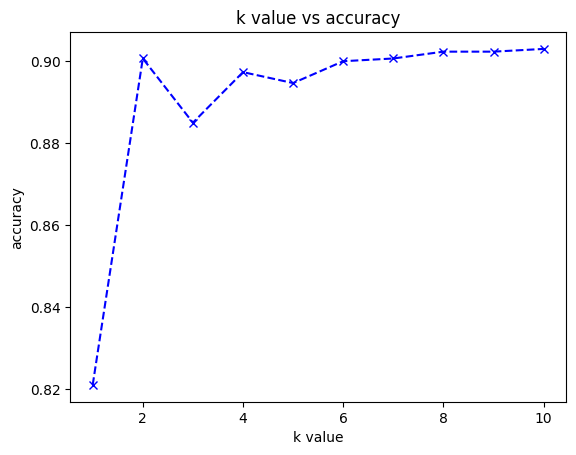

In [ ]:
#k-value vs accuracy
#import library
from sklearn.metrics import accuracy_score
accuracy = []

for i in range (1,11):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(x_train, y_train.ravel())
  y_predict_knn = knn.predict(x_test)
  accuracy.append(accuracy_score(y_test, y_predict_knn.ravel()))
plt.plot(list(range(1,11)), accuracy, color = 'blue', linestyle = 'dashed', marker = 'x')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.title('k value vs accuracy')
plt.show()

In [ ]:
#pickle library, serialize and save the 2 object to files
with open('svm_model.pkl', 'wb') as f:
  pickle.dump(svm, f)
with open('cancer_scaler.pkl', 'wb') as f:
  pickle.dump(sc, f)

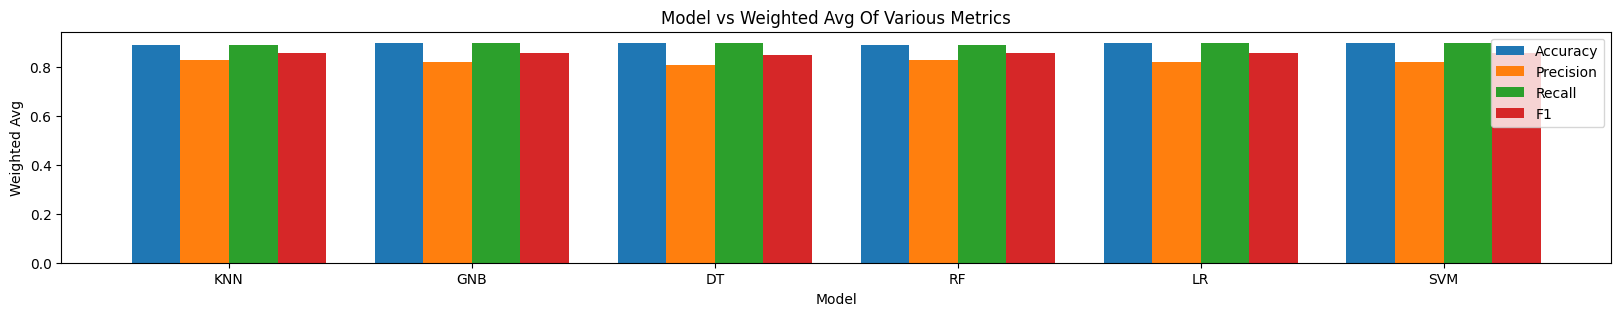

In [ ]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

#create list of all the machine learning models used
X = ['KNN', 'GNB', 'DT', 'RF', 'LR', 'SVM']

#collected information from the classification reports and store them their respective lists
accuracy = [0.89, 0.90, 0.90, 0.89, 0.90, 0.90]
precision = [0.83, 0.82, 0.81, 0.83, 0.82, 0.82]
recall = [0.89, 0.90, 0.90, 0.89, 0.90, 0.90]
f1 = [0.86, 0.86, 0.85, 0.86, 0.86, 0.86]

#assigning number of bars to n_bars variable
n_bars = len(X)

#number of groups of bars (accuracy, precision, recall, f1)
n_groups = 4

#total width for each group of bars
total_width = 0.8

#assigning the width for each individual bar within a group to the variable bar_width
bar_width = total_width / n_groups

#calculate the center positions for each group of bars
X_axis = np.arange(len(X))

#calculate the left positions for each individual bar within a group
left_positions = X_axis - (total_width - bar_width) / 2

#setting the size of the graph
plt.rcParams["figure.figsize"] = (20, 3)

#plotting the bars for each metric using the left positions and respective data
plt.bar(left_positions, accuracy, bar_width, label='Accuracy')
plt.bar(left_positions + bar_width, precision, bar_width, label='Precision')
plt.bar(left_positions + bar_width * 2, recall, bar_width, label='Recall')
plt.bar(left_positions + bar_width * 3, f1, bar_width, label='F1')

#setting the range of values for the X axis and labels
plt.xticks(X_axis, X)
plt.xlabel("Model")
plt.ylabel("Weighted Avg")
plt.title("Model vs Weighted Avg Of Various Metrics")
plt.legend(loc='upper right')

plt.show()
